In [1]:
import praw
import pandas as pd
import datetime as dt

>Calling the praw.Reddit() function and assigning it to a variable

In [2]:
reddit = praw.Reddit(client_id='######', 
                     client_secret='#########', 
                     user_agent='##########', 
                     username='#########', 
                     password='############')
subreddit = reddit.subreddit('india')

In [3]:

flairs = ["AskIndia", "Non-Political", "[R]eddiquette", "Scheduled", "Photography", "Science/Technology", "Politics", "Business/Finance", "Policy/Economy", "Sports", "Food", "AMA"]
topics_dict = {"flair":[], "title":[], "body":[]}

for flair in flairs:
  
  get_subreddits = subreddit.search(flair, sort='new', syntax='cloudsearch', limit=500)
  
  for submission in get_subreddits:
    
    topics_dict["flair"].append(flair)
    topics_dict["title"].append(submission.title)
    topics_dict["body"].append(submission.selftext)

topics_data = pd.DataFrame(topics_dict)
print(topics_data)
 
    
#Code in this cell aimed to get 500 images from each flair type

         flair                                              title  \
0     AskIndia                Why is twitch not popular in India?   
1     AskIndia                                      Business News   
2     AskIndia  The state of UI/UX in India and the possibilit...   
3     AskIndia            When do people become corrupt? And why?   
4     AskIndia           Why can't India and Pakistan make peace?   
...        ...                                                ...   
2521       AMA  [AMA Announcement] Ashish K. Mishra - Managing...   
2522       AMA  Joey for Reddit: First unofficial app that aut...   
2523       AMA  AMA with a Chartered Accountant (CA) on GST - ...   
2524       AMA  AMA on Aadhaar with @prasanna_s from http://ww...   
2525       AMA  AMA with a Chartered Accountant (CA) on GST - ...   

                                                   body  
0     Hello everyone, I hope everyone's doing great ...  
1       \n\n\#BusinessNews\n\n\*Source: Indian Newsp...

In [6]:

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [7]:
topics_data = topics_data[pd.notnull(topics_data['flair'])]
print(topics_data.head(10))
print(topics_data['body'].apply(lambda x: len(x.split(' '))).sum())

      flair                                              title  \
0  AskIndia                Why is twitch not popular in India?   
1  AskIndia                                      Business News   
2  AskIndia  The state of UI/UX in India and the possibilit...   
3  AskIndia            When do people become corrupt? And why?   
4  AskIndia           Why can't India and Pakistan make peace?   
5  AskIndia   AskIndia: Explain me the testing stats of covid.   
6  AskIndia  IFF's Legal Notice to the NCRB on the Revised ...   
7  AskIndia  Mega Exclusive: Sachin Pilot speaks with India...   
8  AskIndia  Air India stooping to new lows! Denying boardi...   
9  AskIndia                Corporate Reservation for Veterans.   

                                                body  
0  Hello everyone, I hope everyone's doing great ...  
1    \n\n\#BusinessNews\n\n\*Source: Indian Newsp...  
2  So this comes after a pretty much futile attem...  
3  Last week, I came with my family from Delhi to... 

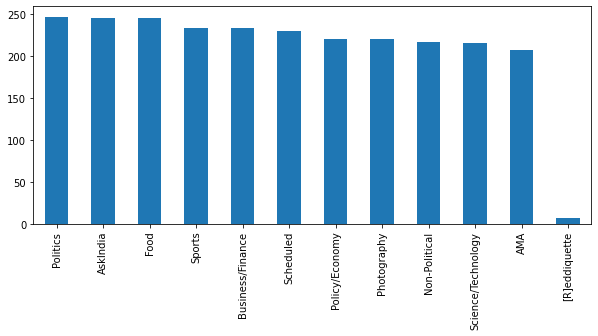

In [8]:

plt.figure(figsize=(10,4))
topics_data.flair.value_counts().plot(kind='bar');

#As seen in the following bar graph, praw allowed for access of not more than 250 posts in each flair.

In [9]:
def print_plot(index):
    example = topics_data[topics_data.index == index][['body', 'flair']].values[0]
    if len(example) > 0:
        print(example[0])
        print('flair', example[1])
print_plot(10)

I ask from a career perspective, not just for personal growth. I do know someone who now works at TCS due to their expertise in Spanish but I want to know from more people. 

I realize that Spanish is spoken 400 million people and 3rd most spoken language in the world but is it worth learning in India?
flair AskIndia


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

>Data cleaning to make it easier to train the model

In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding (specially encoded chars reconverted to original form)
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

topics_data['body'] = topics_data['body'].apply(clean_text)
print_plot(1)

#businessnewssource indian newspapers1 google alphabet ceo sundar pichai announces 10 billion rs 75 000 crore google india digitization fund next 57 years investment done mix equity investments partnerships operational infrastructure ecosystem investmentsinvestments focus four areas important indias digitization# first enabling affordable access information every indian language whether hindi tamil punjabi other# second building new products services deeply relevant indias unique needs# third empowering businesses continue embark digital transformation# fourth leveraging technology ai social good areas like health education agriculture2 google invest rs 33 737 crore 77 per cent stake jio platforms googles new investment gives jio platforms equity valuation 58 billion valuation implied facebook investors including general atlantic silver lake qualcomm intel vista paid 125 premium stake jio platformsas part wednesdays strategic announcement google reliance jio platforms work customizedve

C:\Users\anshu\.conda\envs\Anshul\lib\site-packages\bs4\__init__.py:421: MarkupResemblesLocatorWarning: "https://www.reddit.com/r/IndiaInvestments/comments/8iud4n/ama_on_kuvera_mfs_investing_gaurav_neelabh/

Thanks." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [12]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [13]:
topics_data = topics_data.sample(frac=1).reset_index(drop=True)

#Shuffle dataframe rows except indexes

>Creating and fitting the model

In [14]:
import numpy as np

import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 1000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = int(len(topics_data) * .8) #training : validation = 80:20 

labels={"AskIndia":0, "Non-Political":1, "[R]eddiquette":2, "Scheduled":3, "Photography":4, "Science/Technology":5, 
        "Politics":6, "Business/Finance":7, "Policy/Economy":8, "Sports":9, "Food":10, "AMA":11}
body=topics_data['body'].tolist()
flair=topics_data['flair'].tolist()
train_posts = body[0:training_size]
test_posts = body[training_size:]
train_tags = flair[0:training_size]
test_tags =flair[training_size:]
for i in range(len(test_tags)):
    test_tags[i]=labels[str(test_tags[i])]
for i in range(len(train_tags)):
    train_tags[i]=labels[str(train_tags[i])]
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_posts)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train_posts)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(test_posts)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

num_epochs = 20
training_padded = np.array(training_padded)
training_labels = np.array(train_tags)
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_tags)
history = model.fit(training_padded, training_labels , epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 16)          16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 996, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
Total params: 29,764
Trainable params: 29,764
Non-trainable params: 0
_________________________________________________________________
Train on 2020 samples, validate on 506 samples
Epoch 1/20
2020/2020 [==============================] - 3s 2ms/sample -

In [15]:
def prediction(url):
    submission = reddit.submission(url=str(url))
    #data = {}
    #data["body"] 
    f= str(submission.selftext)
    f = clean_text(f)
    a=[f]    
    seq = tokenizer.texts_to_sequences(a)  # expects a list,not a string
    padd = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
    pred= model.predict(padd)
    return pred

In [16]:
import csv

In [18]:

reverse_word_index = dict([(value, key) for (key, value) in labels.items()])

In [19]:
reverse_word_index 

{0: 'AskIndia',
 1: 'Non-Political',
 2: '[R]eddiquette',
 3: 'Scheduled',
 4: 'Photography',
 5: 'Science/Technology',
 6: 'Politics',
 7: 'Business/Finance',
 8: 'Policy/Economy',
 9: 'Sports',
 10: 'Food',
 11: 'AMA'}

In [20]:
data = pd.read_csv("samplesubmission.csv") 

In [21]:
data


,url,flair
0,https://www.reddit.com/r/india/comments/1s57oi...,NaN
1,https://www.reddit.com/r/india/comments/b7pvwt...,NaN
2,https://www.reddit.com/r/india/comments/bdfid1...,NaN
3,https://www.reddit.com/r/india/comments/cu1xn4...,NaN
4,https://www.reddit.com/r/india/comments/18ntue...,NaN
...,...,...
1406,https://www.reddit.com/r/india/comments/fmuiry...,NaN
1407,https://www.reddit.com/r/india/comments/g6bq7x...,NaN
1408,https://www.reddit.com/r/india/comments/fn3hr7...,NaN
1409,https://www.reddit.com/r/india/comments/fo5p40...,NaN


In [22]:
urls=[]
for i in range(len(data)):
    urls.append(data.iloc[i,0])

In [23]:
urls

['https://www.reddit.com/r/india/comments/1s57oi/need_feedback_for_insurance_policy_that_i_took/',
 'https://www.reddit.com/r/india/comments/b7pvwt/somebody_want_to_kill_my_full_family_what_to_do/',
 'https://www.reddit.com/r/india/comments/bdfid1/ambassador_of_india_takes_back_my_newly_issued/',
 'https://www.reddit.com/r/india/comments/cu1xn4/randians_what_are_you_too_afraid_to_ask/',
 'https://www.reddit.com/r/india/comments/18ntue/askindia_cingari_cengar_or_tzengar/',
 'https://www.reddit.com/r/india/comments/cjv92h/rindia_whats_your_entitledidiotic_indian_abroad/',
 'https://www.reddit.com/r/india/comments/avt1qx/recommendations_for_books_on_indian_history/',
 'https://www.reddit.com/r/india/comments/a2nsgt/what_is_gotra/',
 'https://www.reddit.com/r/india/comments/ai7392/what_happened_to_the_spiritual_country_that_india/',
 'https://www.reddit.com/r/india/comments/968di3/european_looking_for_opinions_from_indians/',
 'https://www.reddit.com/r/india/comments/b0l457/hello_we_are_a_

In [24]:
flairs=[]
link=[]
for i in urls:
    try:
        pred=prediction(str(i))
        predicted_flair_indices=np.argmax(pred,axis=1)
        flairs.append(reverse_word_index[predicted_flair_indices[0]])
        link.append(i)
    except:
        print(i) #prints out non reddit links
        continue
        
    
    
    
    

https://i.reddituploads.com/8cb6eff71adc48918c67c3b8b6951200?fit=max&h=1536&w=1536&s=4b9a828a59db2ed2c3d6917e7df047e2
http://www.ndtv.com/offbeat/from-aadhaar-to-ayurveda-shashi-tharoors-reddit-session-is-a-must-read-1675184
https://www.androidcentral.com/spotify-users-india-can-finally-stream-artists-warner-music?utm_source=ac&utm_medium=reddit&utm_campaign=social_share&utm_content=


C:\Users\anshu\.conda\envs\Anshul\lib\site-packages\bs4\__init__.py:333: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


https://decrypt.co/26603/asias-richest-blockchain-fan-just-won-a-deal-with-facebook?utm_source=reddit&utm_medium=social&utm_campaign=sm


In [25]:
flairs

['AMA',
 'AMA',
 'AskIndia',
 'Photography',
 'Science/Technology',
 'AskIndia',
 'AskIndia',
 'Politics',
 'AskIndia',
 'Politics',
 'AskIndia',
 'Food',
 'Politics',
 'Business/Finance',
 'Business/Finance',
 'Scheduled',
 'Non-Political',
 'Non-Political',
 'Scheduled',
 'AskIndia',
 'Science/Technology',
 'AskIndia',
 'Photography',
 'AskIndia',
 'AskIndia',
 'AskIndia',
 'AskIndia',
 'Sports',
 'Sports',
 'Non-Political',
 'Sports',
 'AskIndia',
 'Policy/Economy',
 'Sports',
 'Non-Political',
 'AskIndia',
 'AskIndia',
 'AskIndia',
 'Politics',
 'AskIndia',
 'AskIndia',
 'AskIndia',
 'Politics',
 'AskIndia',
 'Science/Technology',
 'Politics',
 'Sports',
 'Politics',
 'Sports',
 'AskIndia',
 'Food',
 'Food',
 'AskIndia',
 'AMA',
 'Sports',
 'Scheduled',
 'Food',
 'Non-Political',
 'Food',
 'Policy/Economy',
 'Sports',
 'AskIndia',
 'Food',
 'AskIndia',
 'AskIndia',
 'Politics',
 'Politics',
 'Science/Technology',
 'Sports',
 'Politics',
 'Science/Technology',
 'Politics',
 'Politic

In [27]:
results=pd.DataFrame({"url":link,
                      "flair":flairs})
results.to_csv('submission.csv', index=False)